Alois Schiessel's proof of the Basel Problem (irrationality of z(2))
* arXiv:2303.07526 [math.HO]
* In this paper, we propose a simple proof based on the Weierstrass Sine product formula and L'Hôpital's rule.
* Leonhard Euler originally proved the irrationality of z(2) in 1734

In [5]:
!pip install numpy matplotlib

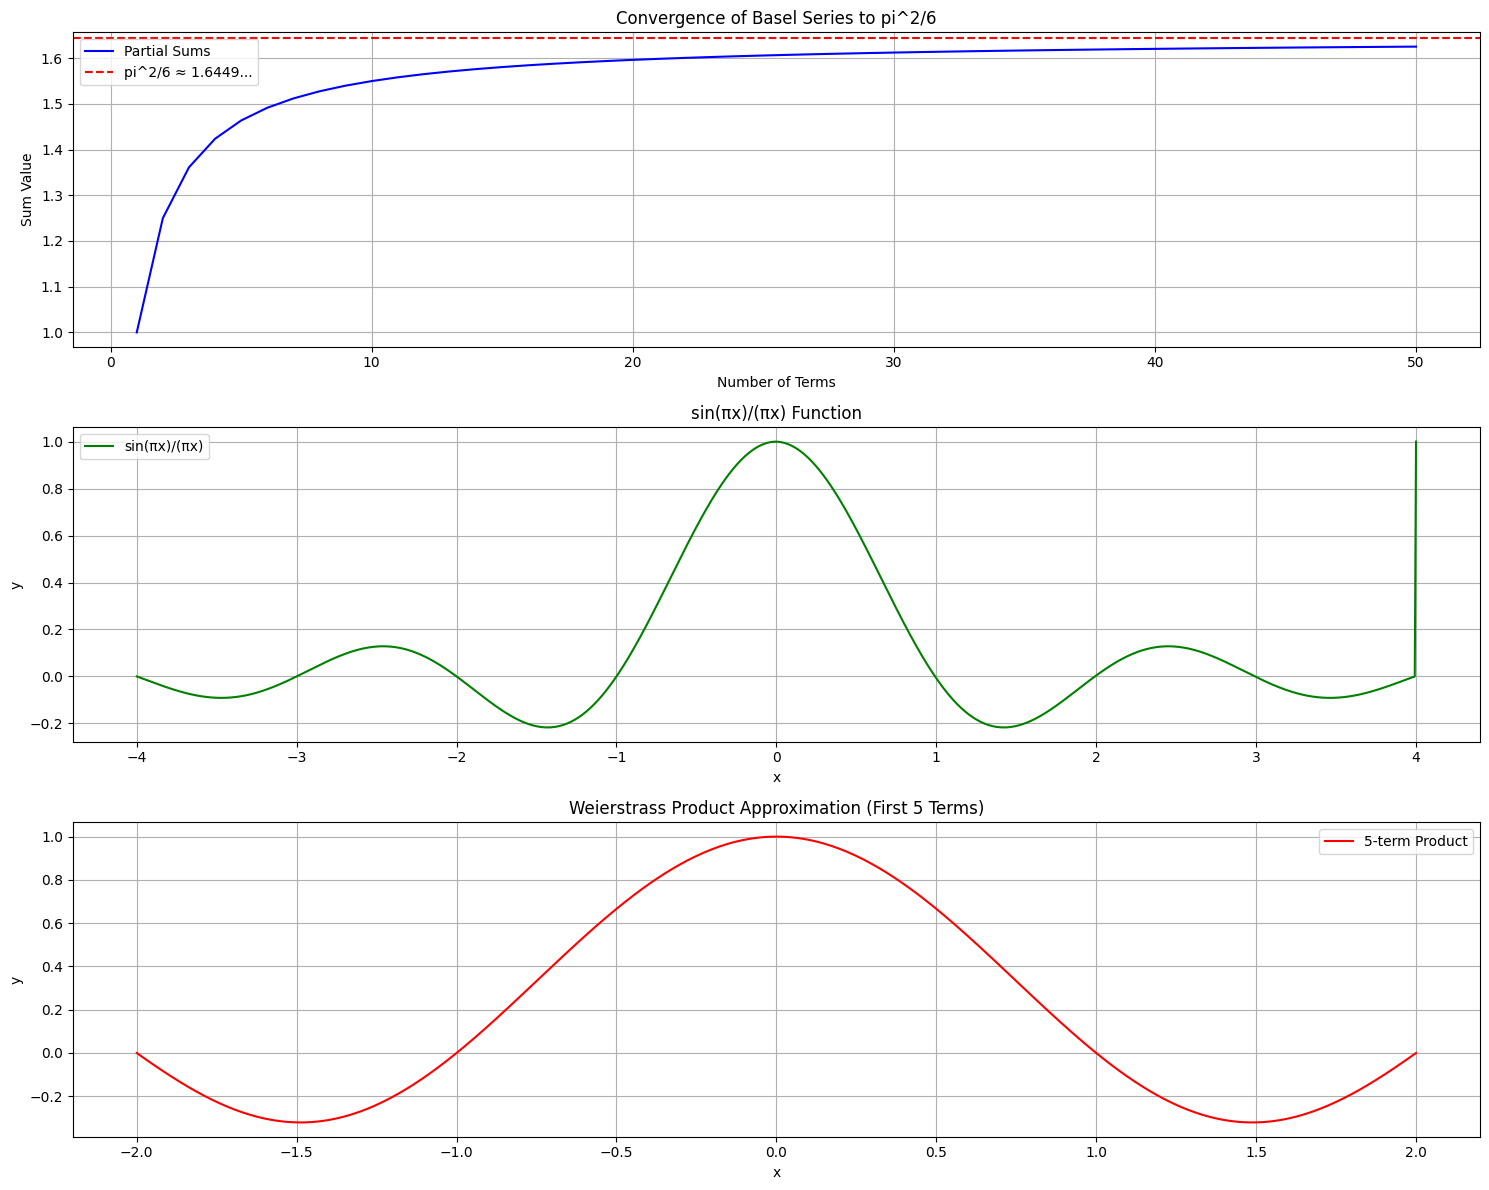

In [6]:
'''
Basel Problem Visualization and Analysis Script

Abstract:
This script provides comprehensive visualizations and numerical analysis of the Basel Problem,
which proves that the sum of reciprocals of squared natural numbers equals pi^2/6. The script
demonstrates three key aspects of the problem:
1. The convergence of the series 1 + 1/4 + 1/9 + ... to pi^2/6
2. The behavior of the function sin(πx)/(πx), crucial to the proof
3. The Weierstrass product formula approximation for the sine function

The visualizations support understanding of Alois Schiessl's proof approach, which uses
the Weierstrass factorization theorem combined with L'Hôpital's rule.

Author: Claude
Date: January 2025
'''

# Import required libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating visualizations
from math import pi  # For using pi in calculations

def generate_partial_sums(num_terms):
    """
    Calculate the partial sums of the Basel series up to a specified number of terms.

    Args:
        num_terms (int): Number of terms to include in the series

    Returns:
        tuple: (terms array, partial sums array)
    """
    # Create array of terms from 1 to num_terms
    terms = np.arange(1, num_terms + 1)
    # Calculate cumulative sum of 1/n² for each term
    partial_sums = np.cumsum(1 / (terms ** 2))
    return terms, partial_sums

def generate_sin_function(x_range):
    """
    Generate points for plotting sin(πx)/(πx), handling the removable singularity at x=0.

    Args:
        x_range (numpy.ndarray): Array of x values

    Returns:
        tuple: (x values array, y values array)
    """
    # Remove x=0 to avoid division by zero
    x = x_range[x_range != 0]
    # Calculate function values
    y = np.sin(pi * x) / (pi * x)

    # Add the limit value at x=0 (using L'Hôpital's rule result)
    x = np.sort(np.append(x, 0))
    y = np.append(y, 1)
    return x, y

def generate_weierstrass_product(x_range, num_terms):
    """
    Generate the Weierstrass product approximation for the sine function.

    Args:
        x_range (numpy.ndarray): Array of x values
        num_terms (int): Number of terms in the product

    Returns:
        numpy.ndarray: Array of y values for the product approximation
    """
    # Initialize product array with ones
    y = np.ones_like(x_range)
    # Multiply by each term in the product
    for k in range(1, num_terms + 1):
        y *= (1 - (x_range ** 2) / (k ** 2))
    return y

def plot_basel_visualizations():
    """
    Create and display all visualizations for the Basel problem.
    """
    # Set up the figure with a clean, modern style
    plt.style.use('default')  # Use default style instead of seaborn
    plt.rcParams['figure.figsize'] = [15, 12]
    plt.rcParams['axes.grid'] = True
    plt.rcParams['font.size'] = 10

    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    # 1. Plot convergence to pi^2/6
    terms, partial_sums = generate_partial_sums(50)
    pi_squared_over_6 = pi ** 2 / 6

    # Plot partial sums and limit value
    ax1.plot(terms, partial_sums, 'b-', label='Partial Sums')
    ax1.axhline(y=pi_squared_over_6, color='r', linestyle='--',
                label='pi^2/6 ≈ 1.6449...')

    # Add labels and grid for first plot
    ax1.set_xlabel('Number of Terms')
    ax1.set_ylabel('Sum Value')
    ax1.set_title('Convergence of Basel Series to pi^2/6')
    ax1.legend()

    # 2. Plot sin(πx)/(πx) function
    x_range = np.linspace(-4, 4, 1000)  # Create 1000 points between -4 and 4
    x_values, y_values = generate_sin_function(x_range)

    ax2.plot(x_values, y_values, 'g-', label='sin(πx)/(πx)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('sin(πx)/(πx) Function')
    ax2.legend()

    # 3. Plot Weierstrass product approximation
    x_range = np.linspace(-2, 2, 500)  # Create 500 points between -2 and 2
    products = generate_weierstrass_product(x_range, 5)

    ax3.plot(x_range, products, 'r-', label='5-term Product')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_title('Weierstrass Product Approximation (First 5 Terms)')
    ax3.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

def print_numerical_analysis():
    """
    Print numerical analysis of the Basel series convergence.
    """
    pi_squared_over_6 = pi ** 2 / 6

    # Print header for numerical results
    print("Numerical Analysis of Basel Series Convergence")
    print("-" * 50)

    # Print analysis for first 50 terms
    terms, sums = generate_partial_sums(50)
    print(f"Value after 50 terms: {sums[-1]:.10f}")
    print(f"pi^2/6: {pi_squared_over_6:.10f}")
    print(f"Absolute error: {abs(sums[-1] - pi_squared_over_6):.10f}")

    # Print detailed convergence for first 10 terms
    print("\nDetailed convergence for first 10 terms:")
    print("n".rjust(3), "Partial Sum".rjust(15), "Error".rjust(15))
    print("-" * 45)
    for n in range(1, 11):
        partial_sum = sum(1/(k**2) for k in range(1, n + 1))
        error = abs(partial_sum - pi_squared_over_6)
        print(f"{n:3d} {partial_sum:15.10f} {error:15.10f}")

# Main execution block
if __name__ == "__main__":
    # Create visualizations
    plot_basel_visualizations()

    # Print numerical analysis
    print_numerical_analysis()